In [130]:
import pandas as pd
import numpy as np
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #그래프 스타일 설정

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
plt.rc("axes", unicode_minus=False) #마이너스 폰트 깨지는 문제 대처
sns.set(font_scale=1.5, font="AppleGothic")

import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
#지도
import folium
from folium import plugins

## Data Load
데이터출처: <a href="https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do">서울시 공공데이터</a>

In [131]:
df=pd.read_csv("data/subway.csv",encoding='cp949')
df.head()

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,201901,경원선,옥수,0.0,0.0,0.0,7.0,19.0,21.0,34.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20190203
1,201901,1호선,서울역,927.0,22.0,10682.0,8774.0,13504.0,45545.0,39110.0,...,19442.0,3612.0,7167.0,0.0,410.0,0.0,0.0,0.0,0.0,20190203
2,201901,1호선,시청,74.0,0.0,2409.0,4049.0,3532.0,19241.0,7703.0,...,4079.0,981.0,1256.0,3.0,29.0,0.0,0.0,0.0,0.0,20190203
3,201901,1호선,종각,100.0,8.0,4409.0,5105.0,4593.0,26969.0,6733.0,...,5560.0,4886.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0,20190203
4,201901,1호선,종로3가,122.0,4.0,5061.0,2520.0,3876.0,12832.0,6066.0,...,5503.0,3214.0,2471.0,0.0,52.0,0.0,0.0,0.0,0.0,20190203


### 가설

- 코로나 이후로 출근길 대중교통 이용량이 줄었을 것이다.

### Data info

In [8]:
#data size
df.shape

(12556, 52)

In [9]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12556 entries, 0 to 12555
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   USE_MON                  12556 non-null  int64  
 1   LINE_NUM                 12556 non-null  object 
 2   SUB_STA_NM               12556 non-null  object 
 3   FOUR_RIDE_NUM            12556 non-null  float64
 4   FOUR_ALIGHT_NUM          12556 non-null  float64
 5   FIVE_RIDE_NUM            12556 non-null  float64
 6   FIVE_ALIGHT_NUM          12556 non-null  float64
 7   SIX_RIDE_NUM             12556 non-null  float64
 8   SIX_ALIGHT_NUM           12556 non-null  float64
 9   SEVEN_RIDE_NUM           12556 non-null  float64
 10  SEVEN_ALIGHT_NUM         12556 non-null  float64
 11  EIGHT_RIDE_NUM           12556 non-null  float64
 12  EIGHT_ALIGHT_NUM         12556 non-null  float64
 13  NINE_RIDE_NUM            12556 non-null  float64
 14  NINE_ALIGHT_NUM       

In [10]:
# null 값 확인
df.isnull().sum()

USE_MON                    0
LINE_NUM                   0
SUB_STA_NM                 0
FOUR_RIDE_NUM              0
FOUR_ALIGHT_NUM            0
FIVE_RIDE_NUM              0
FIVE_ALIGHT_NUM            0
SIX_RIDE_NUM               0
SIX_ALIGHT_NUM             0
SEVEN_RIDE_NUM             0
SEVEN_ALIGHT_NUM           0
EIGHT_RIDE_NUM             0
EIGHT_ALIGHT_NUM           0
NINE_RIDE_NUM              0
NINE_ALIGHT_NUM            0
TEN_RIDE_NUM               0
TEN_ALIGHT_NUM             0
ELEVEN_RIDE_NUM            0
ELEVEN_ALIGHT_NUM          0
TWELVE_RIDE_NUM            0
TWELVE_ALIGHT_NUM          0
THIRTEEN_RIDE_NUM          0
THIRTEEN_ALIGHT_NUM        0
FOURTEEN_RIDE_NUM          0
FOURTEEN_ALIGHT_NUM        0
FIFTEEN_RIDE_NUM           0
FIFTEEN_ALIGHT_NUM         0
SIXTEEN_RIDE_NUM           0
SIXTEEN_ALIGHT_NUM         0
SEVENTEEN_RIDE_NUM         0
SEVENTEEN_ALIGHT_NUM       0
EIGHTEEN_RIDE_NUM          0
EIGHTEEN_ALIGHT_NUM        0
NINETEEN_RIDE_NUM          0
NINETEEN_ALIGH

In [12]:
# 날짜 범위 201901 ~ 202009 (프로젝트 시점 20191012)
df['USE_MON'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009])

In [13]:
df['SUB_STA_NM'].unique()

array(['옥수', '서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원',
       '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)',
       '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)',
       '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대',
       '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림',
       '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)',
       '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발',
       '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '충무로',
       '동대입구', '약수', '금호', '압구정', '신사', '잠원', '고속터미널', '남부터미널(예술의전당)',
       '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원', '수서', '가락시장',
       '경찰병원', '오금', '당고개', '상계', '노원', '창동', '쌍문', '수유(강북구청)',
       '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)', '한성대입구(삼선교)', '혜화',
       '명동', '회현(남대문시장)', '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)',
       '동작(현충원)', '총신대입

In [14]:
df['LINE_NUM'].unique()

array(['경원선', '1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선',
       '9호선', '9호선2~3단계', '경강선', '경부선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

### Data Preprocessing

1) 데이터 줄이기: 출근길 데이터만 추출
- 08시 ~ 09시 하차
- 09시 ~ 10시 하차

In [132]:
Columns_list = ['USE_MON', 'LINE_NUM', 'SUB_STA_NM','EIGHT_ALIGHT_NUM','NINE_ALIGHT_NUM']

In [133]:
print(df.shape)
df=df[Columns_list]
print(df.shape)

(12556, 52)
(12556, 5)


2) 컬럼명 보기 쉽게 바꿔주기

In [134]:
df.columns = ['날짜','호선','역명','8~9시 하차','9~10시 하차']
df.head()

,날짜,호선,역명,8~9시 하차,9~10시 하차
0,201901,경원선,옥수,250.0,31.0
1,201901,1호선,서울역,236747.0,163026.0
2,201901,1호선,시청,209349.0,88793.0
3,201901,1호선,종각,300081.0,167611.0
4,201901,1호선,종로3가,84155.0,100477.0


3) 8시 ~ 10시 데이터 합쳐주기

In [135]:
df['8~10시 하차']=df['8~9시 하차'] + df['9~10시 하차']

In [136]:
df.sample(1)

,날짜,호선,역명,8~9시 하차,9~10시 하차,8~10시 하차
4744,201908,일산선,원흥,10637.0,8953.0,19590.0


4) 호선 별로 나눠져있는 정보 취합

In [137]:
# 한 역명에 호선이 여러개일경우 하차 정보가 나뉘어져있는데, 역명으로 통합하자
df.loc[df['역명'] == '사당','호선'].unique()

array(['2호선', '4호선'], dtype=object)

In [138]:
df=df.groupby(['날짜','역명'])['8~10시 하차'].sum().reset_index()
df.sample(1)

,날짜,역명,8~10시 하차
3367,201907,신중동,79699.0


5) 연도 & 월 분리

In [139]:
df['날짜']=df['날짜'].astype('str')

In [140]:
df['연도']=df['날짜'].apply(lambda x: x[:4])
df['월']=df['날짜'].apply(lambda x: x[4:])

In [141]:
df[df['날짜'] =='201910']

,날짜,역명,8~10시 하차,연도,월
4581,201910,4.19민주묘지,18786.0,2019,10
4582,201910,가능,28785.0,2019,10
4583,201910,가락시장,109291.0,2019,10
4584,201910,가산디지털단지,880472.0,2019,10
4585,201910,가양,72588.0,2019,10
...,...,...,...,...,...
5085,201910,회기,135920.0,2019,10
5086,201910,회룡,26393.0,2019,10
5087,201910,회현(남대문시장),299768.0,2019,10
5088,201910,효창공원앞,74974.0,2019,10


### 시각화를 위해 역별 주소 정보 추가
역 주소정보 크롤링 & Geocode by Awesome Table 를 이용해 도로명 주소 위경도를 받기

In [287]:
ad=pd.read_csv('data/add_all2.csv')
ad=ad.drop_duplicates('역명')
ad

,역명,상세주소,Latitude,Longitude
0,서울,서울특별시 중구 봉래동2가 122 서울역(1호선),37.557407,126.969500
1,시청,서울특별시 중구 정동 5-5 시청역(1호선),37.565704,126.976862
2,종각,서울특별시 종로구 종로1가 54 종각지하철역사,37.570178,126.983116
3,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),37.570432,126.992190
4,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,37.570831,127.002351
...,...,...,...,...
277,송파나루,서울특별시 송파구 백제고분로 446,37.510428,127.112746
278,한성백제,송파구 위례성대로 51,37.513208,127.122946
279,올림픽공원,서울특별시 송파구 양재대로 1233,37.516449,127.131107
280,둔촌오륜,서울특별시 강동구 강동대로 305,37.520010,127.140673


In [288]:
# 가장 최근 2020년 9월 유동인구 시각화
d2009=df.loc[df['날짜'] == '202009',['역명','8~10시 하차']]

In [289]:
# 주소 (ad) 테이블과 유동인구 (df) 테이블 역명 매칭 안되는것 찾기
m09=ad.merge(d2009,on='역명',how='left')
m09[m09['8~10시 하차'].isnull()]

,역명,상세주소,Latitude,Longitude,8~10시 하차
0,서울,서울특별시 중구 봉래동2가 122 서울역(1호선),37.557407,126.969500,NaN
13,동대문역사문화공원,서울특별시 중구 을지로 7가 112-3 동대문역사문화공원역(2호선),37.565718,127.008485,NaN
31,교대(법원·검찰청),서울특별시 서초구 서초동 1748-4 교대역(2호선),37.488767,127.019023,NaN
35,낙성대,서울특별시 관악구 봉천동 1693-39 2호선 낙성대역사,37.471101,126.959990,NaN
133,종로3가(탑골공원),서울특별시 종로구 낙원동 126 종로3가역(5호선),37.570432,126.992190,NaN
197,용마산,서울특별시 중랑구 면목동 1382-13 용마산역,37.573793,127.086818,NaN
239,남한산성입구(성남법원•검찰청),경기도 성남시 수정구 단대동 96 남한산성입구역,37.451532,127.159789,NaN
247,마곡나루,서울특별시 강서구 마곡중앙5로 지하2,37.553197,126.829835,NaN
259,흑석,서울특별시 동작구 현충로 지하90 (흑석동),37.508476,126.964041,NaN
260,동작,서울특별시 동작구 현충로 지하220 (동작동),37.503341,126.977843,NaN


### 역명 매칭안된 것 하나하나 알아보기

In [259]:
# 주소 테이블 -> 마곡나루, 유동인구 테이블 -> 마곡나루(서울식물원)
d2009[d2009['역명'].str.contains('마곡나루')]

,역명,8~10시 하차
10337,마곡나루(서울식물원),106616.0


In [260]:
# 주소 테이블 -> 용마산, 유동인구 테이블 -> 용마산(용마폭포공원)
d2009[d2009['역명'].str.contains('용마산')]

,역명,8~10시 하차
10570,용마산(용마폭포공원),14056.0


In [261]:
# 주소 테이블 -> 동대문역사문화공원, 유동인구 테이블 -> 동대문역사문화공원(DDP)
d2009[d2009['역명'].str.contains('동대문역사문화공원')]

,역명,8~10시 하차
10321,동대문역사문화공원(DDP),197345.0


In [262]:
# 주소 테이블 -> 낙성대, 유동인구 테이블 -> 낙성대(강감찬)
d2009[d2009['역명'].str.contains('낙성대')]

,역명,8~10시 하차
10269,낙성대(강감찬),59450.0


In [263]:
# 주소 테이블 -> 서울, 유동인구 테이블 -> 서울역
d2001[d2001['역명'].str.contains('서울')]

,역명,8~10시 하차
6124,강변(동서울터미널),109272.0
6136,경복궁(정부서울청사),179103.0
6146,공릉(서울과학기술대),38722.0
6284,미아(서울사이버대학),49226.0
6310,봉화산(서울의료원),19669.0
6353,서울대입구(관악구청),134488.0
6354,서울숲,57442.0
6355,서울역,643989.0
6568,청량리(서울시립대입구),120701.0
6608,화랑대(서울여대입구),18407.0


In [264]:
# 주소 테이블 -> 교대(법원·검찰청), 유동인구 테이블 -> 교대(법원.검찰청) (점이다름)
d2001[d2001['역명'].str.contains('교대')]

,역명,8~10시 하차
6157,교대(법원.검찰청),380718.0


In [265]:
# 주소 테이블 -> 종로3가(탑골공원), 유동인구 테이블 -> 종로3가
d2001[d2001['역명'].str.contains('종로3가')]

,역명,8~10시 하차
6537,종로3가,357296.0


In [266]:
# 주소 테이블 -> 남한산성입구(성남법원•검찰청), 유동인구 테이블 -> 남한산성입구(성남법원.검찰청)
d2001[d2001['역명'].str.contains('남한산성')]

,역명,8~10시 하차
6196,남한산성입구(성남법원.검찰청),34406.0


In [267]:
# 주소 테이블 -> 흑석, 유동인구 테이블 -> 흑석(중앙대입구)
d2001[d2001['역명'].str.contains('흑석')]

,역명,8~10시 하차
6616,흑석(중앙대입구),32418.0


In [268]:
# 주소 테이블 -> 동작, 유동인구 테이블 -> 동작(현충원)
d2001[d2001['역명'].str.contains('동작')]

,역명,8~10시 하차
6247,동작(현충원),16750.0


In [269]:
# 주소 테이블 -> 올림픽공원, 유동인구 테이블 -> 올림픽공원(한국체대)
d2001[d2001['역명'].str.contains('올림픽공원')]

,역명,8~10시 하차
6479,올림픽공원(한국체대),35980.0


### 두 테이블 역명 동일하게 맞춰주자

In [290]:
def change(name):
    if name == '서울':
        return "서울역"
    elif name == '교대(법원·검찰청)':
        return "교대(법원.검찰청)"
    elif name == '종로3가(탑골공원)':
        return '종로3가'
    elif name == '남한산성입구(성남법원•검찰청)':
        return '남한산성입구(성남법원.검찰청)'
    elif name == '흑석':
        return '흑석(중앙대입구)'
    elif name == '동작':
        return '동작(현충원)'
    elif name == '올림픽공원':
        return '올림픽공원(한국체대)'
    elif name == '낙성대':
        return '낙성대(강감찬)'
    elif name ==  '동대문역사문화공원':
        return '동대문역사문화공원(DDP)'
    elif name == '용마산':
        return '용마산(용마폭포공원)'
    elif name =='마곡나루':
        return '마곡나루(서울식물원)'
    else:
        return name
    
ad['역명2']=ad['역명'].apply(change)

In [292]:
# 중복제거해주자
ad=ad.drop_duplicates('역명2')
ad

,역명,상세주소,Latitude,Longitude,역명2
0,서울,서울특별시 중구 봉래동2가 122 서울역(1호선),37.557407,126.969500,서울역
1,시청,서울특별시 중구 정동 5-5 시청역(1호선),37.565704,126.976862,시청
2,종각,서울특별시 종로구 종로1가 54 종각지하철역사,37.570178,126.983116,종각
3,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),37.570432,126.992190,종로3가
4,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,37.570831,127.002351,종로5가
...,...,...,...,...,...
275,석촌고분,서울특별시 송파구 삼학사로 53,37.501983,127.096596,석촌고분
277,송파나루,서울특별시 송파구 백제고분로 446,37.510428,127.112746,송파나루
278,한성백제,송파구 위례성대로 51,37.513208,127.122946,한성백제
280,둔촌오륜,서울특별시 강동구 강동대로 305,37.520010,127.140673,둔촌오륜


### 전처리 해준 데이터로 주소 table,  유동인구 table merge 

In [294]:
merged=d2009.merge(ad,left_on='역명',right_on='역명2',how='left')
merged

,역명_x,8~10시 하차,역명_y,상세주소,Latitude,Longitude,역명2
0,4.19민주묘지,8087.0,NaN,NaN,NaN,NaN,NaN
1,가능,19104.0,NaN,NaN,NaN,NaN,NaN
2,가락시장,87941.0,가락시장,서울특별시 송파구 가락동 184-23 가락시장역,37.492970,127.118010,가락시장
3,가산디지털단지,719963.0,가산디지털단지,서울특별시 금천구 가산동 54-3 가산디지털단지역,37.479620,126.882090,가산디지털단지
4,가양,56698.0,가양,서울특별시 강서구 양천로 지하485,37.561727,126.853979,가양
...,...,...,...,...,...,...,...
512,회기,64586.0,NaN,NaN,NaN,NaN,NaN
513,회룡,20055.0,NaN,NaN,NaN,NaN,NaN
514,회현(남대문시장),192464.0,회현(남대문시장),서울특별시 중구 남창동 64-1 회현역 4호선,37.558244,126.975731,회현(남대문시장)
515,효창공원앞,51169.0,효창공원앞,서울특별시 용산구 효창동 80 효창공원앞역,37.539298,126.961356,효창공원앞


In [296]:
merged

,역명_x,8~10시 하차,역명_y,상세주소,Latitude,Longitude,역명2
0,4.19민주묘지,8087.0,NaN,NaN,NaN,NaN,NaN
1,가능,19104.0,NaN,NaN,NaN,NaN,NaN
2,가락시장,87941.0,가락시장,서울특별시 송파구 가락동 184-23 가락시장역,37.492970,127.118010,가락시장
3,가산디지털단지,719963.0,가산디지털단지,서울특별시 금천구 가산동 54-3 가산디지털단지역,37.479620,126.882090,가산디지털단지
4,가양,56698.0,가양,서울특별시 강서구 양천로 지하485,37.561727,126.853979,가양
...,...,...,...,...,...,...,...
512,회기,64586.0,NaN,NaN,NaN,NaN,NaN
513,회룡,20055.0,NaN,NaN,NaN,NaN,NaN
514,회현(남대문시장),192464.0,회현(남대문시장),서울특별시 중구 남창동 64-1 회현역 4호선,37.558244,126.975731,회현(남대문시장)
515,효창공원앞,51169.0,효창공원앞,서울특별시 용산구 효창동 80 효창공원앞역,37.539298,126.961356,효창공원앞


### 주소 정보 없지만, 유동인구 데이터 있는 역들 확인

In [297]:
list(merged.loc[merged['역명2'].isnull(),'역명_x'])

['4.19민주묘지',
 '가능',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강매',
 '강촌',
 '개봉',
 '개포동',
 '검암',
 '경기광주',
 '경마공원',
 '계양',
 '고색',
 '고잔',
 '곡산',
 '곤지암',
 '공항화물청사',
 '과천',
 '관악',
 '광명',
 '광운대',
 '구로',
 '구룡',
 '구리',
 '구성',
 '구일',
 '국수',
 '군포',
 '굴봉산',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '기흥',
 '김유정',
 '남동인더스파크',
 '남영',
 '남춘천',
 '녹양',
 '녹천',
 '능곡',
 '달월',
 '당정',
 '대곡',
 '대공원',
 '대모산입구',
 '대방',
 '대성리',
 '대야미',
 '대화',
 '덕계',
 '덕소',
 '덕정',
 '도농',
 '도봉',
 '도심',
 '도원',
 '도화',
 '독산',
 '동두천',
 '동두천중앙',
 '동암',
 '동인천',
 '두정',
 '마두',
 '마석',
 '망우',
 '망월사',
 '망포',
 '매교',
 '매탄권선',
 '명학',
 '문산',
 '미금',
 '미사',
 '반월',
 '방학',
 '배방',
 '백마',
 '백석',
 '백양리',
 '백운',
 '범계',
 '별내',
 '병점',
 '보산',
 '보정',
 '봉명',
 '부개',
 '부발',
 '부천',
 '부평',
 '북한산보국문',
 '북한산우이',
 '사릉',
 '사리',
 '산본',
 '삼동',
 '삼송',
 '삼양',
 '삼양사거리',
 '상갈',
 '상록수',
 '상천',
 '서강대',
 '서동탄',
 '서빙고',
 '서울숲',
 '서정리',
 '서현',
 '석수',
 '선바위',
 '성균관대',
 '성환',
 '세류',
 '세마',
 '세종대왕릉',
 '소래포구',
 '소사',
 '소요산',
 '솔밭공원',
 '솔샘',
 '송내',
 '송도',
 '송탄',
 '수내',
 '수리산',
 '수색

몇 군데 제외하고는 대부분 경기도에 있는 역이 많다.

아래서 알아볼 출근 유동인구 TOP 지역에 포함되는 역이 누락되진 않았으므로 제외하고 진행한다.

In [298]:
seoul=merged[merged['역명2'].notnull()]

### 202009 출근시각 서울 내 지하철역 유동인구

In [309]:
map=folium.Map(location=[37.544,127],zoom_start=13)
for n in seoul.index:
    name = seoul.loc[n,'역명_x']
    location = [seoul.loc[n,'Latitude'],seoul.loc[n,'Longitude']]
    radius = seoul.loc[n,'8~10시 하차'] / 40000
    popup = seoul.loc[n,'역명_x']
    folium.CircleMarker(
        location = location,
        popup = popup,
        radius = radius,
        fill = True
    ).add_to(map)
map

### 202009 서울 내 출근 시간 유동인구 Top 10 지하철역

In [302]:
d2009_top10=merged.sort_values('8~10시 하차',ascending=False).head(10)
d2009_top10

,역명_x,8~10시 하차,역명_y,상세주소,Latitude,Longitude,역명2
3,가산디지털단지,719963.0,가산디지털단지,서울특별시 금천구 가산동 54-3 가산디지털단지역,37.479620,126.882090,가산디지털단지
258,선릉,600131.0,선릉,서울특별시 강남구 삼성동 172-66 선릉역,37.508826,127.063067,선릉
11,강남,519233.0,강남,서울특별시 강남구 역삼동 858 강남역,37.497017,127.028168,강남
355,역삼,489968.0,역삼,서울특별시 강남구 역삼동 804 역삼역,37.498128,127.028303,역삼
225,삼성(무역센터),445672.0,삼성(무역센터),서울특별시 강남구 삼성동 172-66 삼성역,37.508826,127.063067,삼성(무역센터)
292,시청,442147.0,시청,서울특별시 중구 정동 5-5 시청역(1호선),37.565704,126.976862,시청
250,서울역,412881.0,서울,서울특별시 중구 봉래동2가 122 서울역(1호선),37.557407,126.969500,서울역
352,여의도,400363.0,여의도,서울특별시 영등포구 여의도동 3 여의도역,37.521799,126.924466,여의도
400,을지로입구,346627.0,을지로입구,서울특별시 중구 을지로1가 100-1 을지로입구역,37.566065,126.982679,을지로입구
52,구로디지털단지,340970.0,구로디지털단지,서울특별시 구로구 구로동 810-3 구로디지털단지역,37.484980,126.901220,구로디지털단지


In [305]:
map=folium.Map(location=[37.544,127],zoom_start=13)
for n in d2009_top10.index:
    name = d2009_top10.loc[n,'역명_x']
    location = [d2009_top10.loc[n,'Latitude'],d2009_top10.loc[n,'Longitude']]
    radius = d2009_top10.loc[n,'8~10시 하차'] / 30000
    popup = d2009_top10.loc[n,'역명_x']
    folium.CircleMarker(
        location = location,
        popup = popup,
        radius = radius,
        fill = True
    ).add_to(map)
map

### 202009 서울 내 출근 시간 유동인구 Top 20 지하철역

In [306]:
d2009_top20=merged.sort_values('8~10시 하차',ascending=False).head(20)
d2009_top20

,역명_x,8~10시 하차,역명_y,상세주소,Latitude,Longitude,역명2
3,가산디지털단지,719963.0,가산디지털단지,서울특별시 금천구 가산동 54-3 가산디지털단지역,37.479620,126.882090,가산디지털단지
258,선릉,600131.0,선릉,서울특별시 강남구 삼성동 172-66 선릉역,37.508826,127.063067,선릉
11,강남,519233.0,강남,서울특별시 강남구 역삼동 858 강남역,37.497017,127.028168,강남
355,역삼,489968.0,역삼,서울특별시 강남구 역삼동 804 역삼역,37.498128,127.028303,역삼
225,삼성(무역센터),445672.0,삼성(무역센터),서울특별시 강남구 삼성동 172-66 삼성역,37.508826,127.063067,삼성(무역센터)
292,시청,442147.0,시청,서울특별시 중구 정동 5-5 시청역(1호선),37.565704,126.976862,시청
250,서울역,412881.0,서울,서울특별시 중구 봉래동2가 122 서울역(1호선),37.557407,126.969500,서울역
352,여의도,400363.0,여의도,서울특별시 영등포구 여의도동 3 여의도역,37.521799,126.924466,여의도
400,을지로입구,346627.0,을지로입구,서울특별시 중구 을지로1가 100-1 을지로입구역,37.566065,126.982679,을지로입구
52,구로디지털단지,340970.0,구로디지털단지,서울특별시 구로구 구로동 810-3 구로디지털단지역,37.484980,126.901220,구로디지털단지


In [308]:
map=folium.Map(location=[37.544,127],zoom_start=13)
for n in d2009_top20.index:
    name = d2009_top20.loc[n,'역명_x']
    location = [d2009_top20.loc[n,'Latitude'],d2009_top20.loc[n,'Longitude']]
    radius = d2009_top20.loc[n,'8~10시 하차'] / 30000
    popup = d2009_top20.loc[n,'역명_x']
    folium.CircleMarker(
        location = location,
        popup = popup,
        radius = radius,
        fill = True
    ).add_to(map)
map

### 주요 출근역 2019년이랑 유동인구 비교
- 월별 유동인구 top10 역 구하기 (groupby + rank())

In [140]:
df['rank']=df.groupby(['날짜'])['8~10시 하차'].rank(method='dense',ascending=False)

In [141]:
rank_top10=[1,2,3,4,5,6,7,8,9,10]
top10=df[df['rank'].isin(rank_top10)]
top10

,날짜,역명,8~10시 하차,rank,연도,월
3,201901,가산디지털단지,940736.0,1.0,2019,1
11,201901,강남,799839.0,3.0,2019,1
222,201901,삼성(무역센터),657115.0,6.0,2019,1
247,201901,서울역,674727.0,5.0,2019,1
255,201901,선릉,811197.0,2.0,2019,1
...,...,...,...,...,...,...
10446,202009,선릉,600131.0,2.0,2020,9
10480,202009,시청,442147.0,6.0,2020,9
10540,202009,여의도,400363.0,8.0,2020,9
10543,202009,역삼,489968.0,4.0,2020,9


In [142]:
top10.loc[top10['rank'] == 1,['날짜','역명','rank']]

,날짜,역명,rank
3,201901,가산디지털단지,1.0
512,201902,가산디지털단지,1.0
1021,201903,가산디지털단지,1.0
1530,201904,가산디지털단지,1.0
2039,201905,가산디지털단지,1.0
2548,201906,가산디지털단지,1.0
3057,201907,가산디지털단지,1.0
3566,201908,가산디지털단지,1.0
4075,201909,가산디지털단지,1.0
4584,201910,가산디지털단지,1.0


In [143]:
top10.loc[top10['rank'] == 2,['날짜','역명','rank']]

,날짜,역명,rank
255,201901,선릉,2.0
520,201902,강남,2.0
1273,201903,선릉,2.0
1782,201904,선릉,2.0
2291,201905,선릉,2.0
2800,201906,선릉,2.0
3309,201907,선릉,2.0
3818,201908,선릉,2.0
4327,201909,선릉,2.0
4836,201910,선릉,2.0


In [144]:
top10.loc[top10['rank'] == 3,['날짜','역명','rank']]

,날짜,역명,rank
11,201901,강남,3.0
764,201902,선릉,3.0
1029,201903,강남,3.0
1538,201904,강남,3.0
2047,201905,강남,3.0
2556,201906,강남,3.0
3065,201907,강남,3.0
3574,201908,강남,3.0
4083,201909,강남,3.0
4592,201910,강남,3.0


In [145]:
top10.loc[top10['rank'] == 4,['날짜','역명','rank']]

,날짜,역명,rank
350,201901,역삼,4.0
756,201902,서울역,4.0
1265,201903,서울역,4.0
1774,201904,서울역,4.0
2283,201905,서울역,4.0
2792,201906,서울역,4.0
3301,201907,서울역,4.0
3810,201908,서울역,4.0
4319,201909,서울역,4.0
4828,201910,서울역,4.0


In [146]:
top10.loc[top10['rank'] == 5,['날짜','역명','rank']]

,날짜,역명,rank
247,201901,서울역,5.0
859,201902,역삼,5.0
1368,201903,역삼,5.0
1877,201904,역삼,5.0
2386,201905,역삼,5.0
2895,201906,역삼,5.0
3404,201907,역삼,5.0
3913,201908,역삼,5.0
4422,201909,역삼,5.0
4803,201910,삼성(무역센터),5.0


In [147]:
top10.loc[top10['rank'] == 6,['날짜','역명','rank']]

,날짜,역명,rank
222,201901,삼성(무역센터),6.0
731,201902,삼성(무역센터),6.0
1240,201903,삼성(무역센터),6.0
1749,201904,삼성(무역센터),6.0
2258,201905,삼성(무역센터),6.0
2767,201906,삼성(무역센터),6.0
3276,201907,삼성(무역센터),6.0
3785,201908,삼성(무역센터),6.0
4294,201909,삼성(무역센터),6.0
4931,201910,역삼,6.0


In [148]:
top10.loc[top10['rank'] == 7,['날짜','역명','rank']]

,날짜,역명,rank
289,201901,시청,7.0
798,201902,시청,7.0
1307,201903,시청,7.0
1816,201904,시청,7.0
2325,201905,시청,7.0
2834,201906,시청,7.0
3343,201907,시청,7.0
3852,201908,시청,7.0
4361,201909,시청,7.0
4870,201910,시청,7.0


In [149]:
top10.loc[top10['rank'] == 8,['날짜','역명','rank']]

,날짜,역명,rank
394,201901,을지로입구,8.0
922,201902,잠실(송파구청),8.0
1412,201903,을지로입구,8.0
1874,201904,여의도,8.0
2449,201905,잠실(송파구청),8.0
2939,201906,을지로입구,8.0
3401,201907,여의도,8.0
3976,201908,잠실(송파구청),8.0
4466,201909,을지로입구,8.0
4994,201910,잠실(송파구청),8.0


In [150]:
top10.loc[top10['rank'] == 9,['날짜','역명','rank']]

,날짜,역명,rank
347,201901,여의도,9.0
903,201902,을지로입구,9.0
1365,201903,여의도,9.0
1921,201904,을지로입구,9.0
2430,201905,을지로입구,9.0
2958,201906,잠실(송파구청),9.0
3448,201907,을지로입구,9.0
3957,201908,을지로입구,9.0
4419,201909,여의도,9.0
4928,201910,여의도,9.0


In [151]:
top10.loc[top10['rank'] == 10,['날짜','역명','rank']]

,날짜,역명,rank
413,201901,잠실(송파구청),10.0
856,201902,여의도,10.0
1431,201903,잠실(송파구청),10.0
1940,201904,잠실(송파구청),10.0
2383,201905,여의도,10.0
2892,201906,여의도,10.0
3467,201907,잠실(송파구청),10.0
3910,201908,여의도,10.0
4485,201909,잠실(송파구청),10.0
4975,201910,을지로입구,10.0


In [154]:
top10['역명'].unique()

array(['가산디지털단지', '강남', '삼성(무역센터)', '서울역', '선릉', '시청', '여의도', '역삼',
       '을지로입구', '잠실(송파구청)', '구로디지털단지'], dtype=object)

### 출근길 유동인구 top10 역 2019년과 비교 시각화

 1) 가산디지털단지, 구로디지털단지

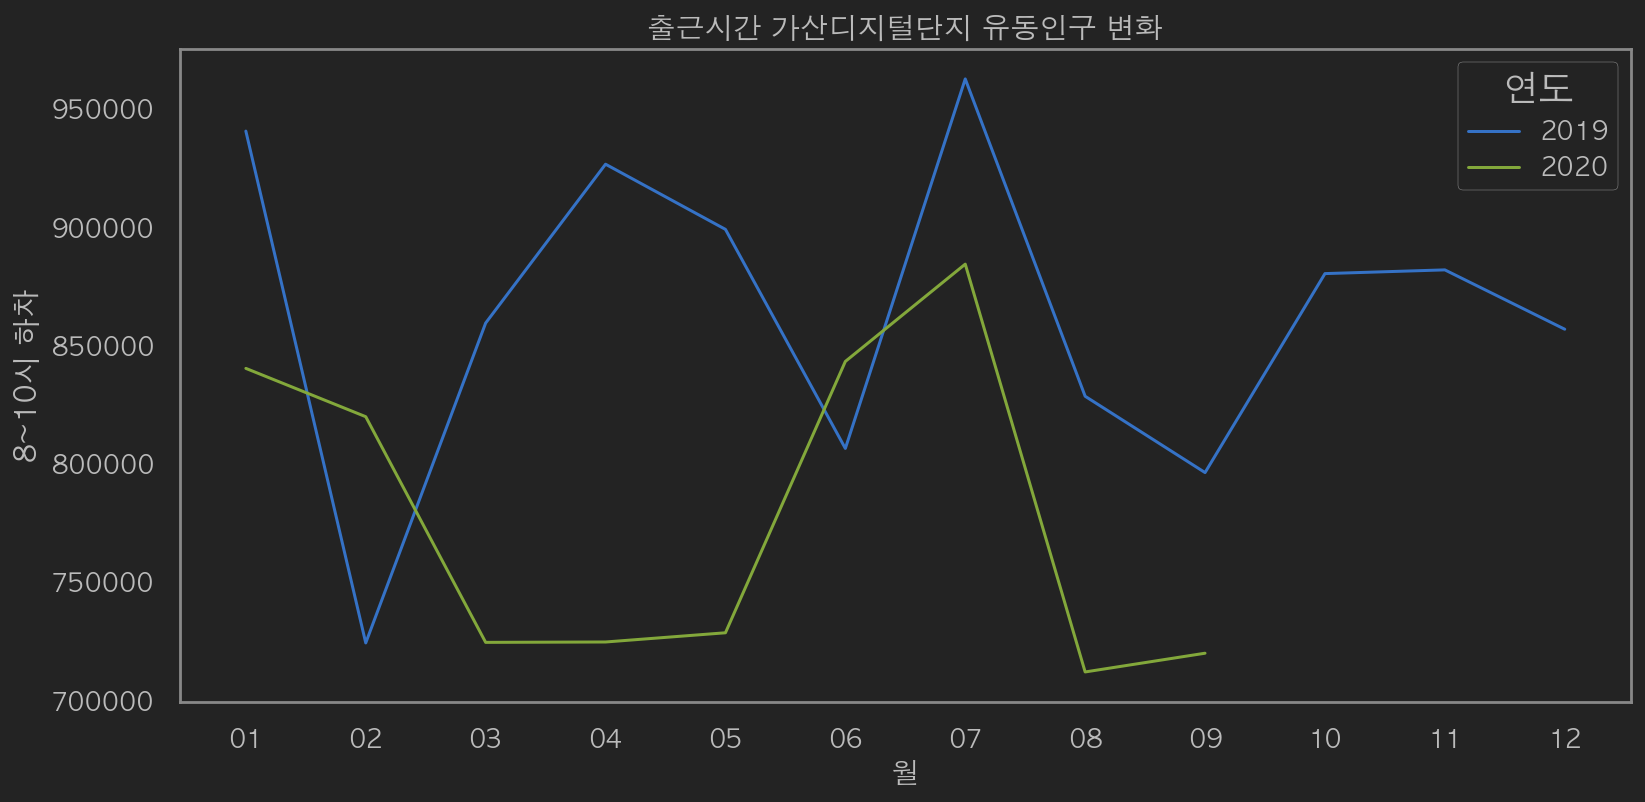

In [198]:
plt.figure(figsize=(13,6))
plt.title('출근시간 가산디지털단지 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '가산디지털단지'],x='월', y='8~10시 하차',hue='연도')


<AxesSubplot:title={'center':'출근시간 구로디지털단지 유동인구 변화'}, xlabel='월', ylabel='8~10시 하차'>

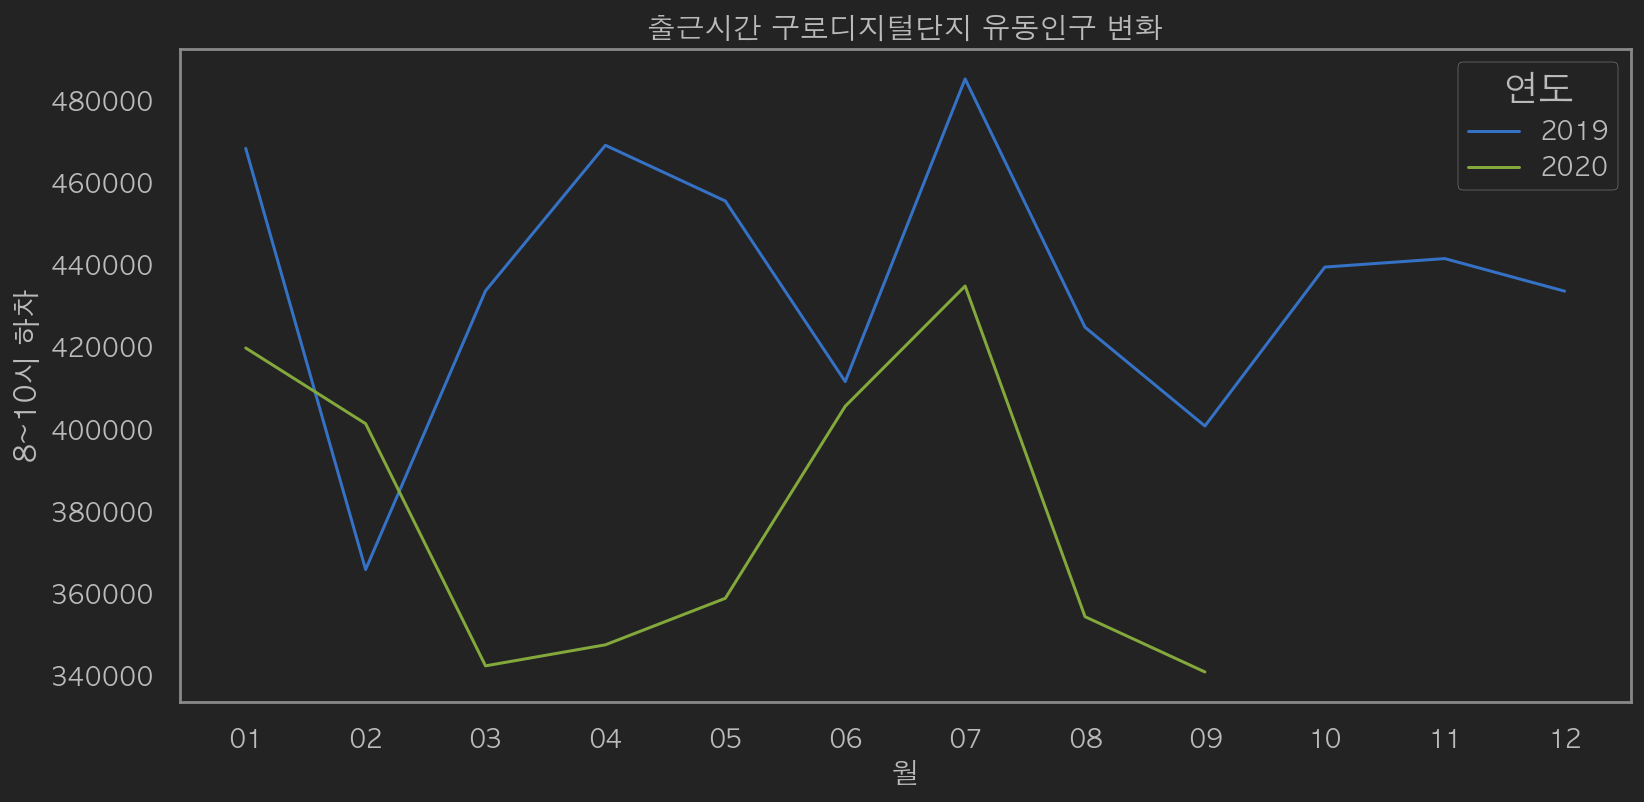

In [199]:
plt.figure(figsize=(13,6))
plt.title('출근시간 구로디지털단지 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '구로디지털단지'],x='월', y='8~10시 하차',hue='연도')

2) '강남', '삼성(무역센터)', '선릉', '역삼'

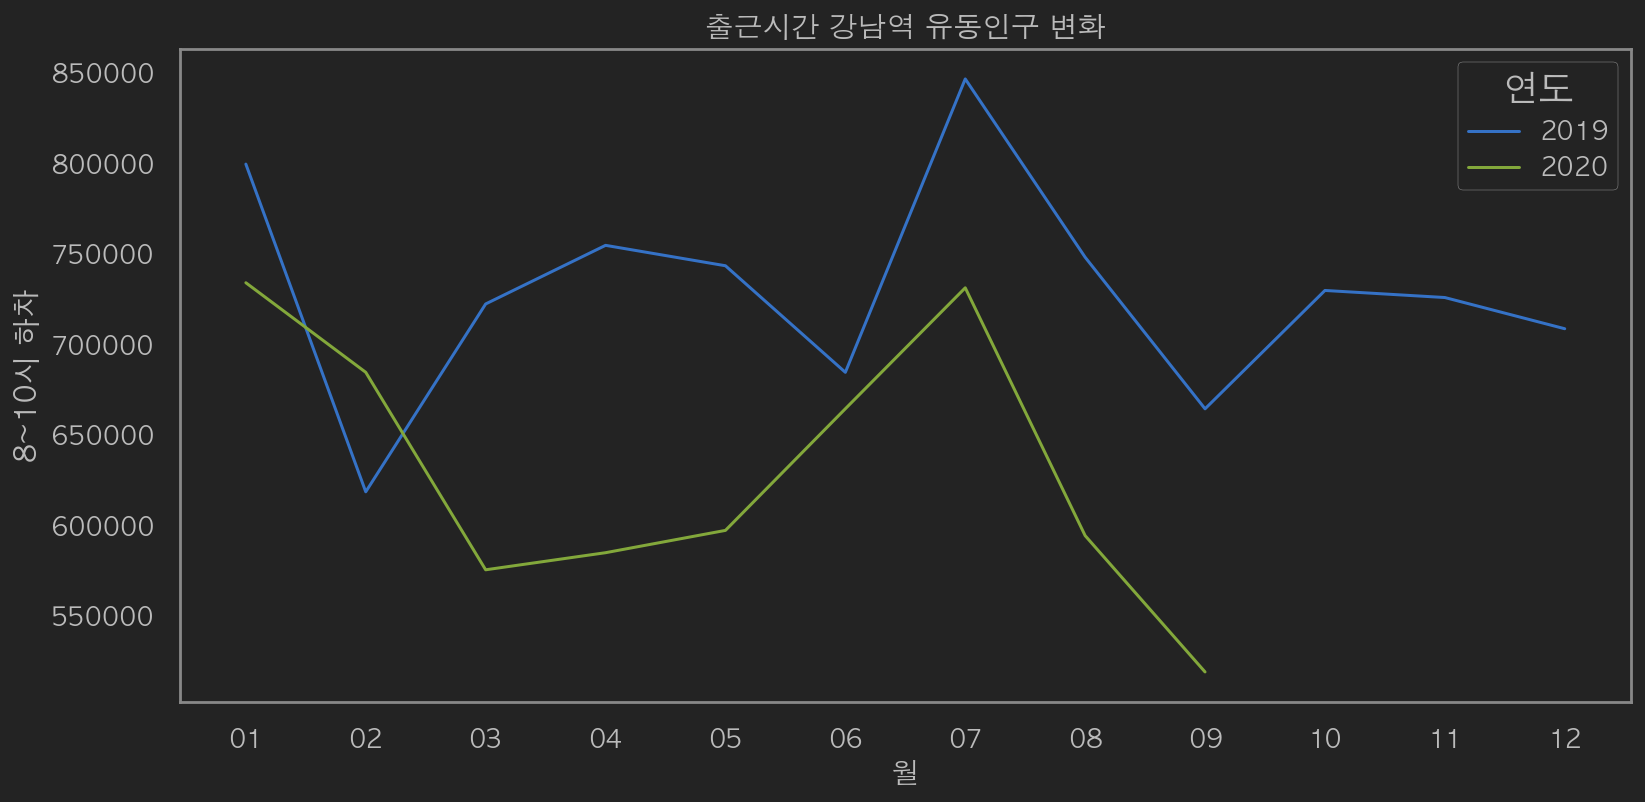

In [200]:
plt.figure(figsize=(13,6))
plt.title('출근시간 강남역 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '강남'],x='월', y='8~10시 하차',hue='연도')

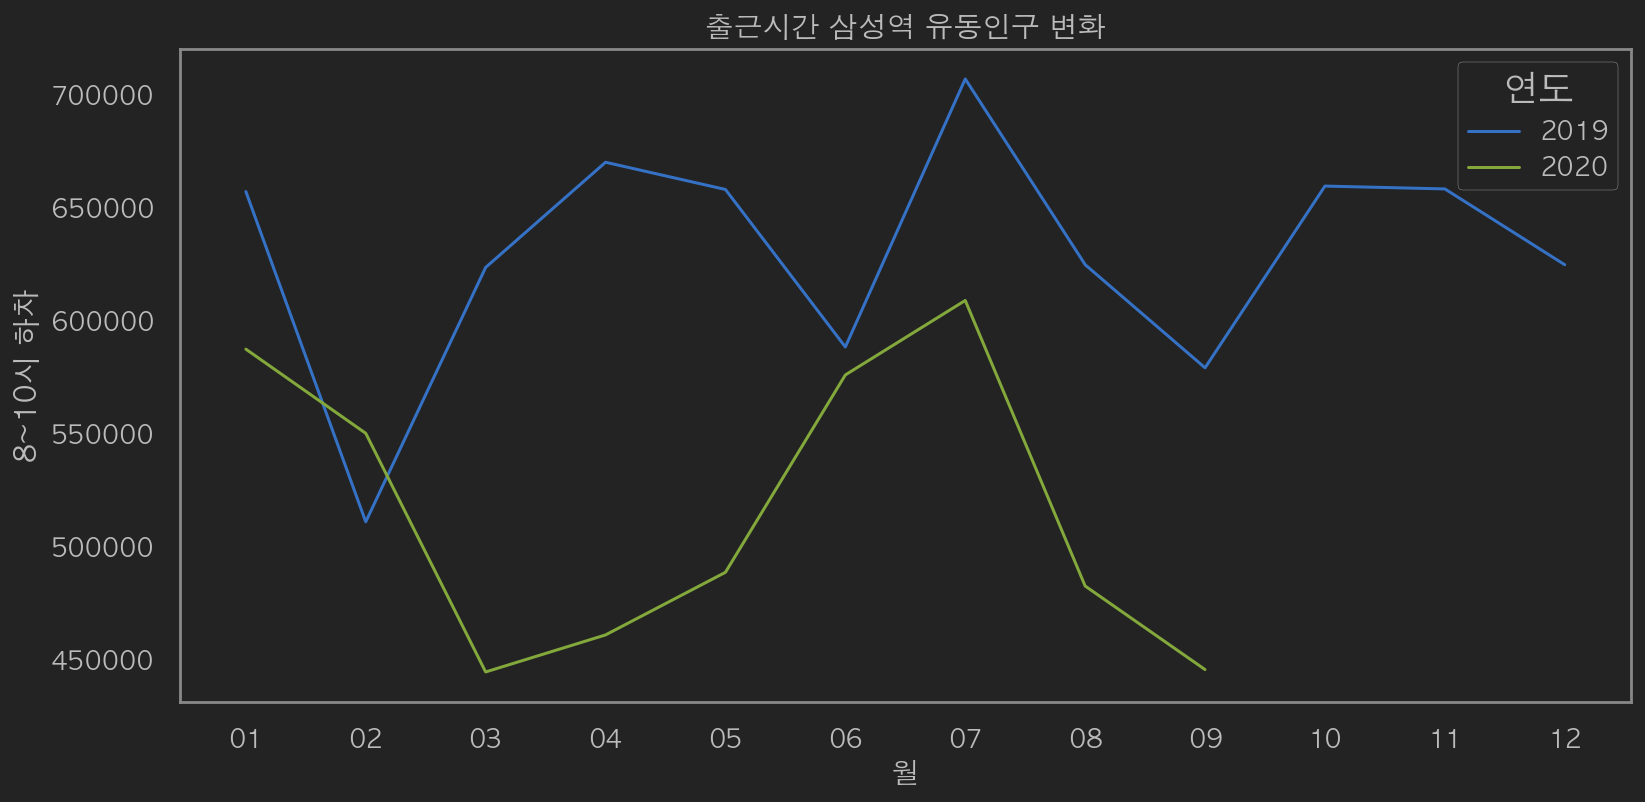

In [201]:
plt.figure(figsize=(13,6))
plt.title('출근시간 삼성역 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '삼성(무역센터)'],x='월', y='8~10시 하차',hue='연도')

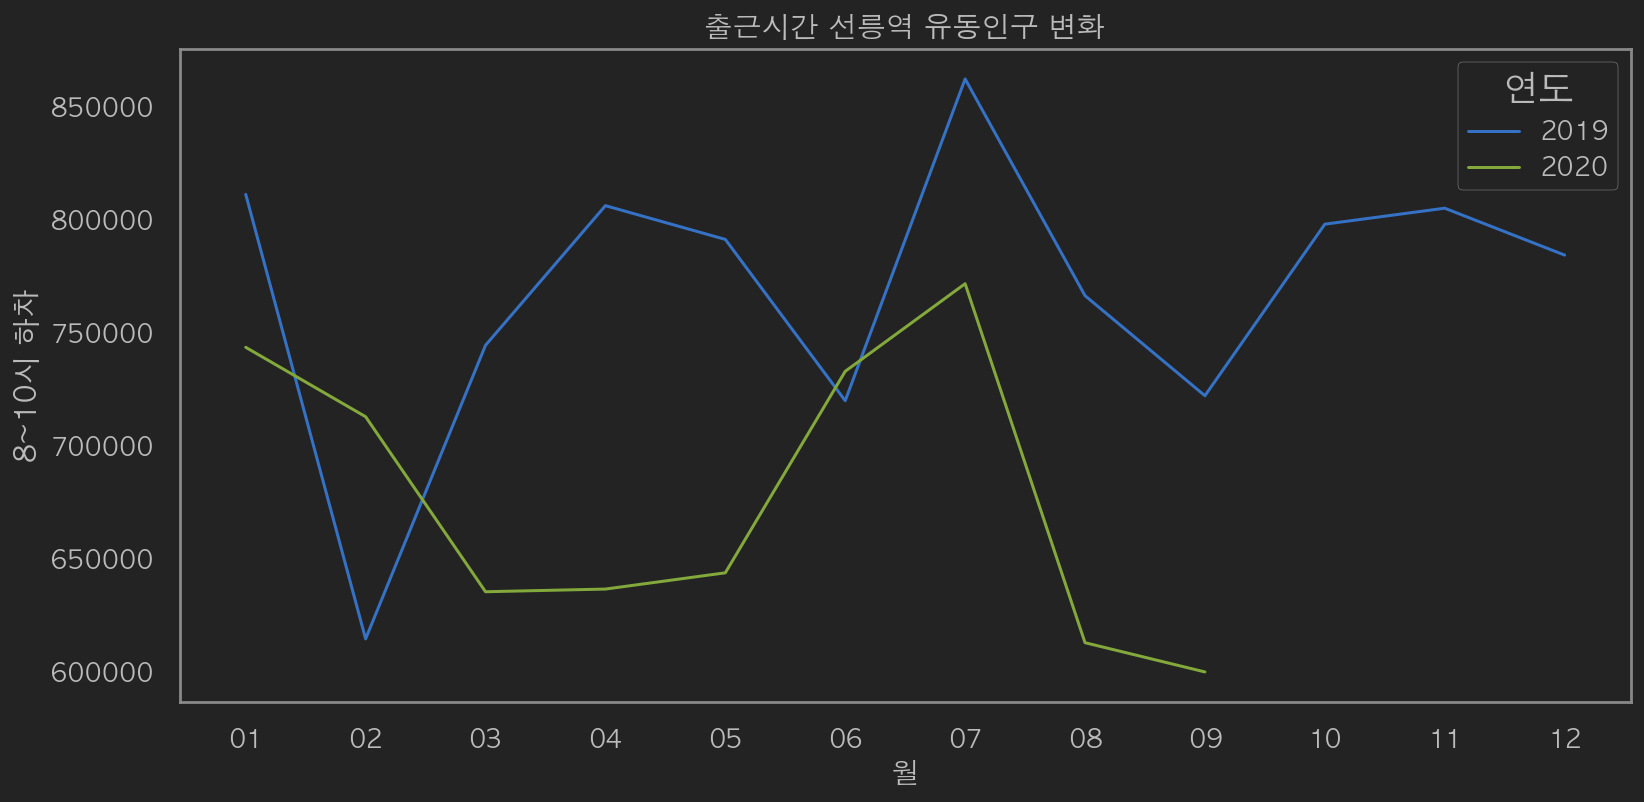

In [203]:
plt.figure(figsize=(13,6))
plt.title('출근시간 선릉역 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '선릉'],x='월', y='8~10시 하차',hue='연도')

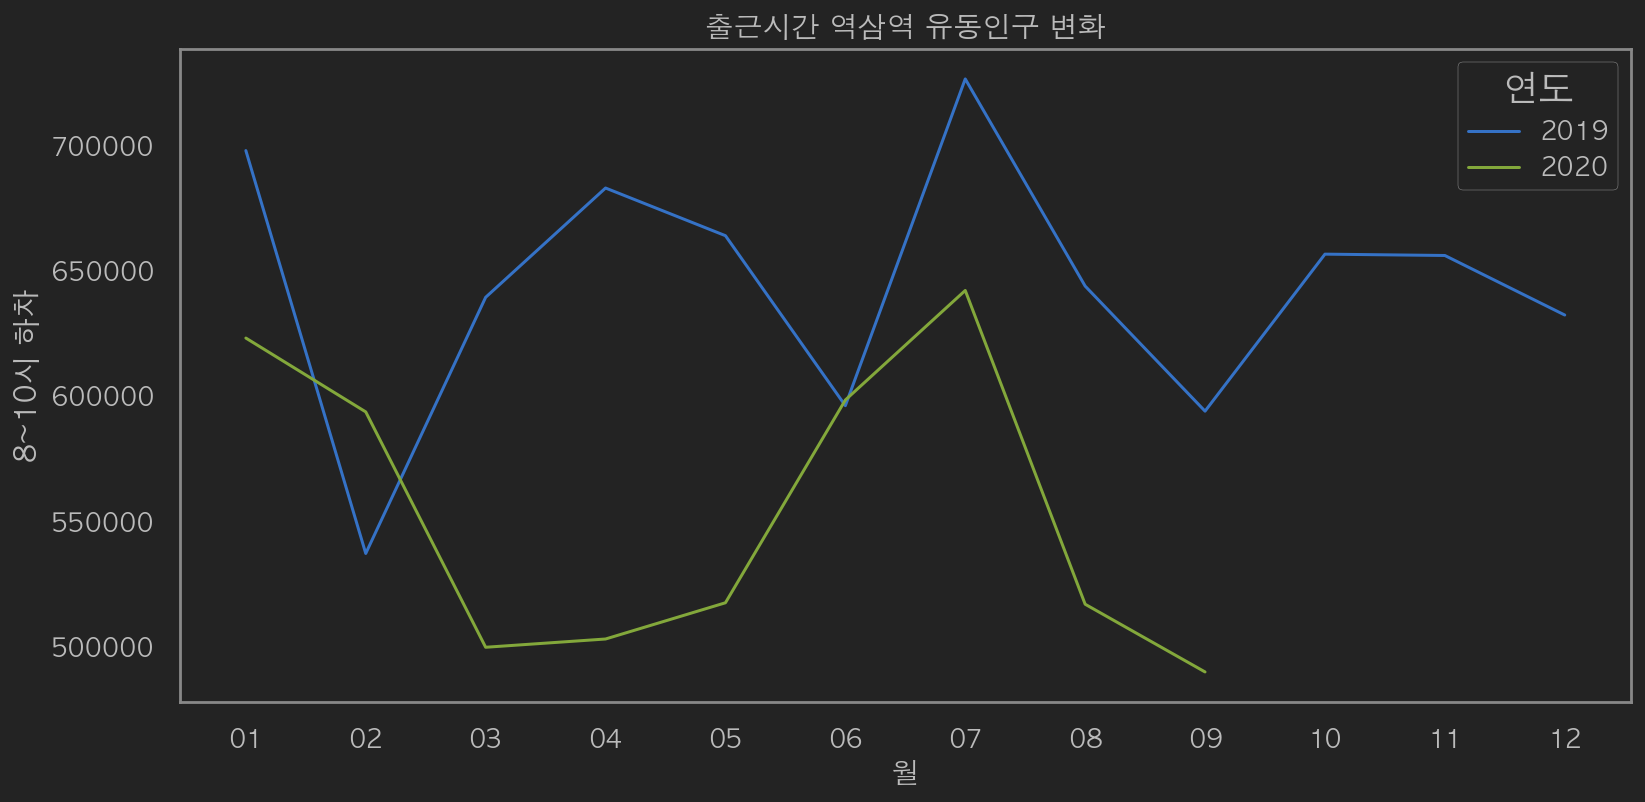

In [204]:
plt.figure(figsize=(13,6))
plt.title('출근시간 역삼역 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '역삼'],x='월', y='8~10시 하차',hue='연도')

3) '서울역', '시청' , '을지로입구'

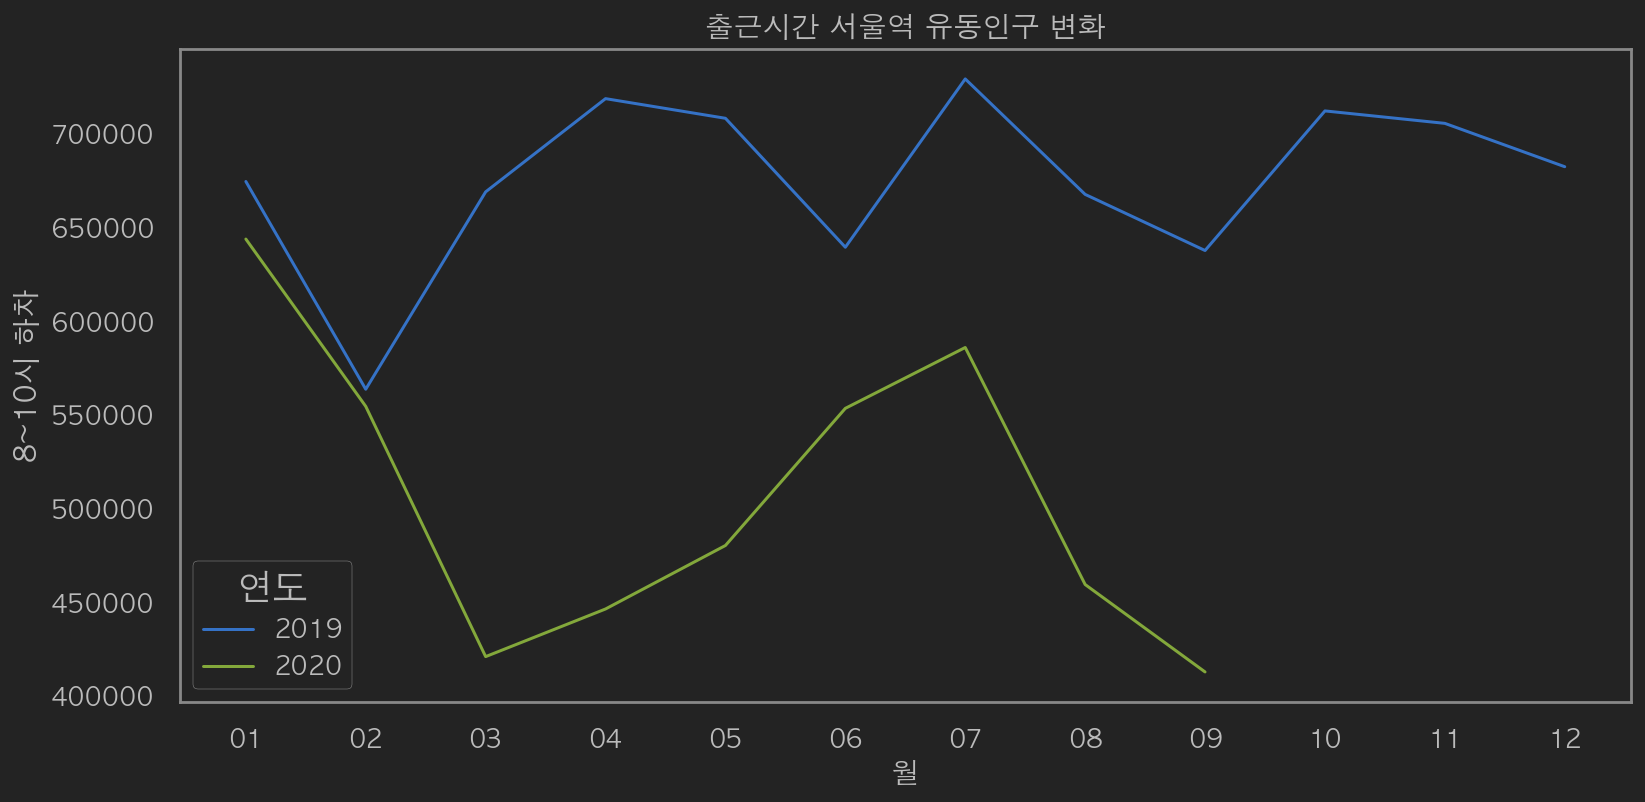

In [206]:
plt.figure(figsize=(13,6))
plt.title('출근시간 서울역 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '서울역'],x='월', y='8~10시 하차',hue='연도')

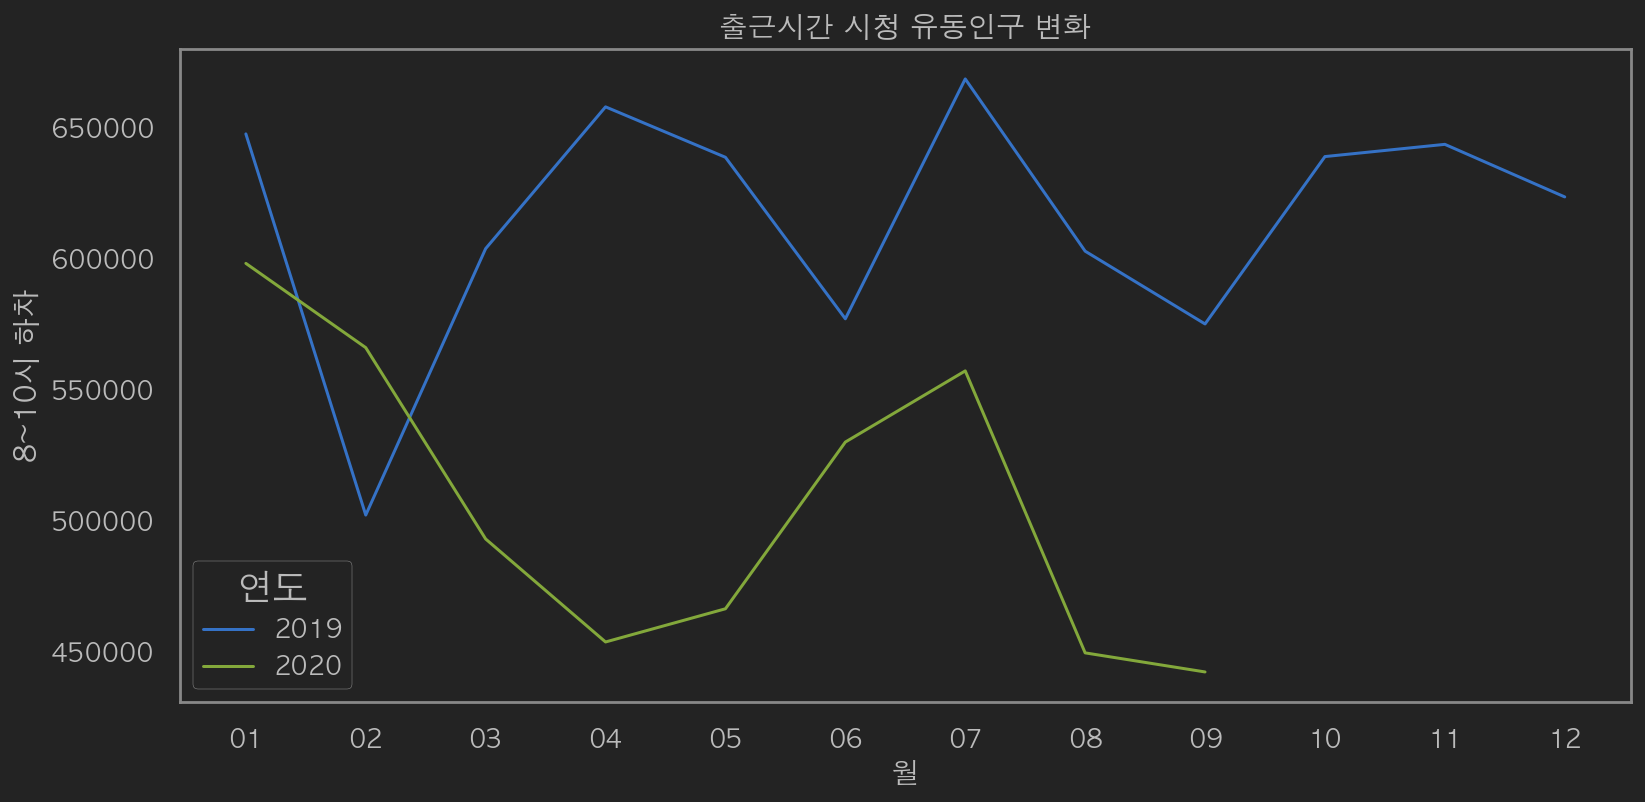

In [207]:
plt.figure(figsize=(13,6))
plt.title('출근시간 시청 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '시청'],x='월', y='8~10시 하차',hue='연도')

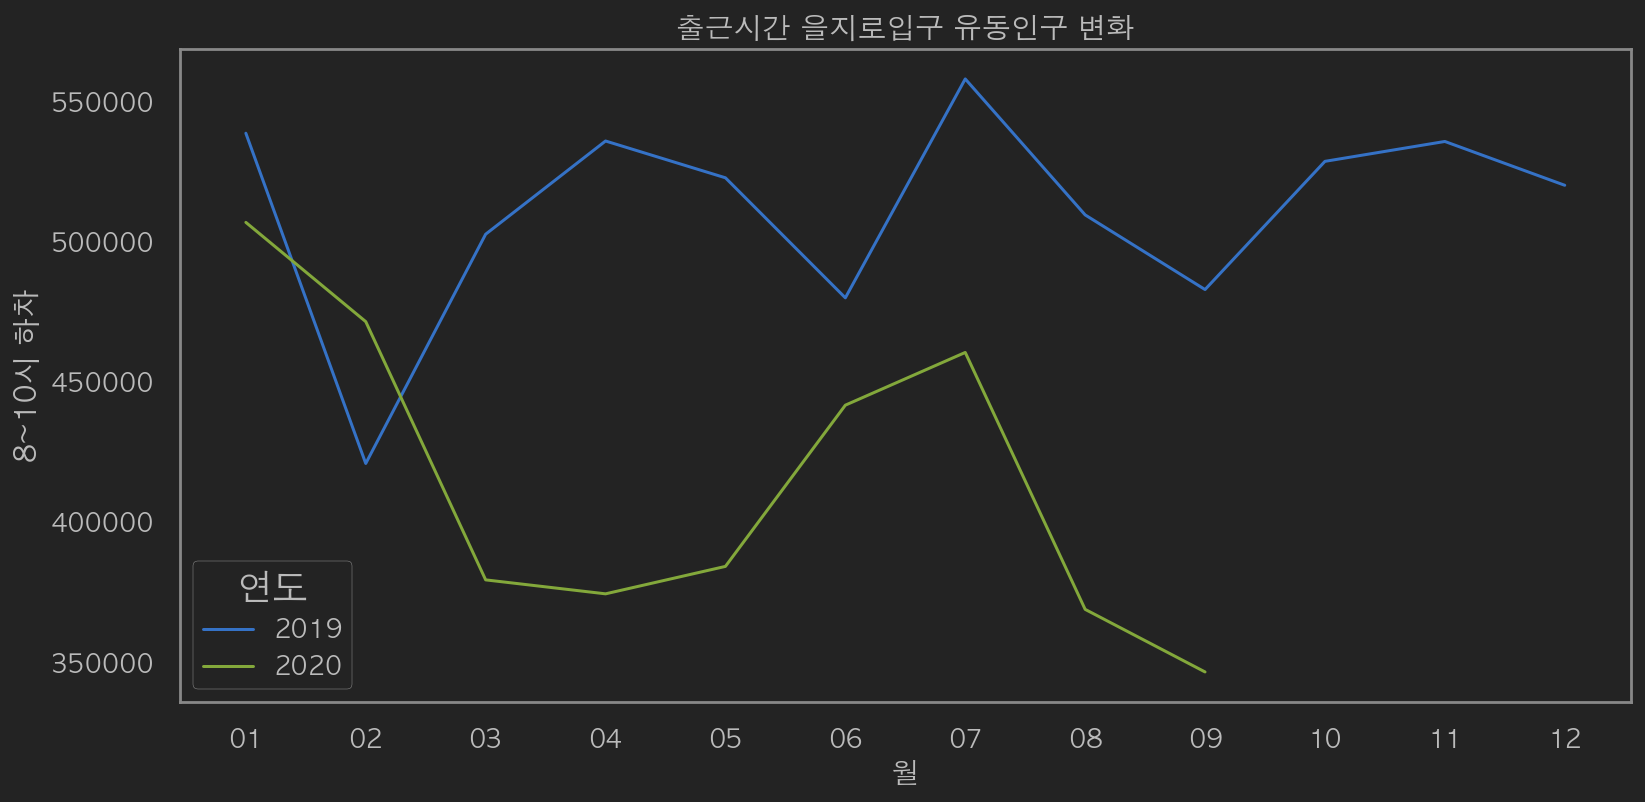

In [208]:
plt.figure(figsize=(13,6))
plt.title('출근시간 을지로입구 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '을지로입구'],x='월', y='8~10시 하차',hue='연도')

4) 여의도

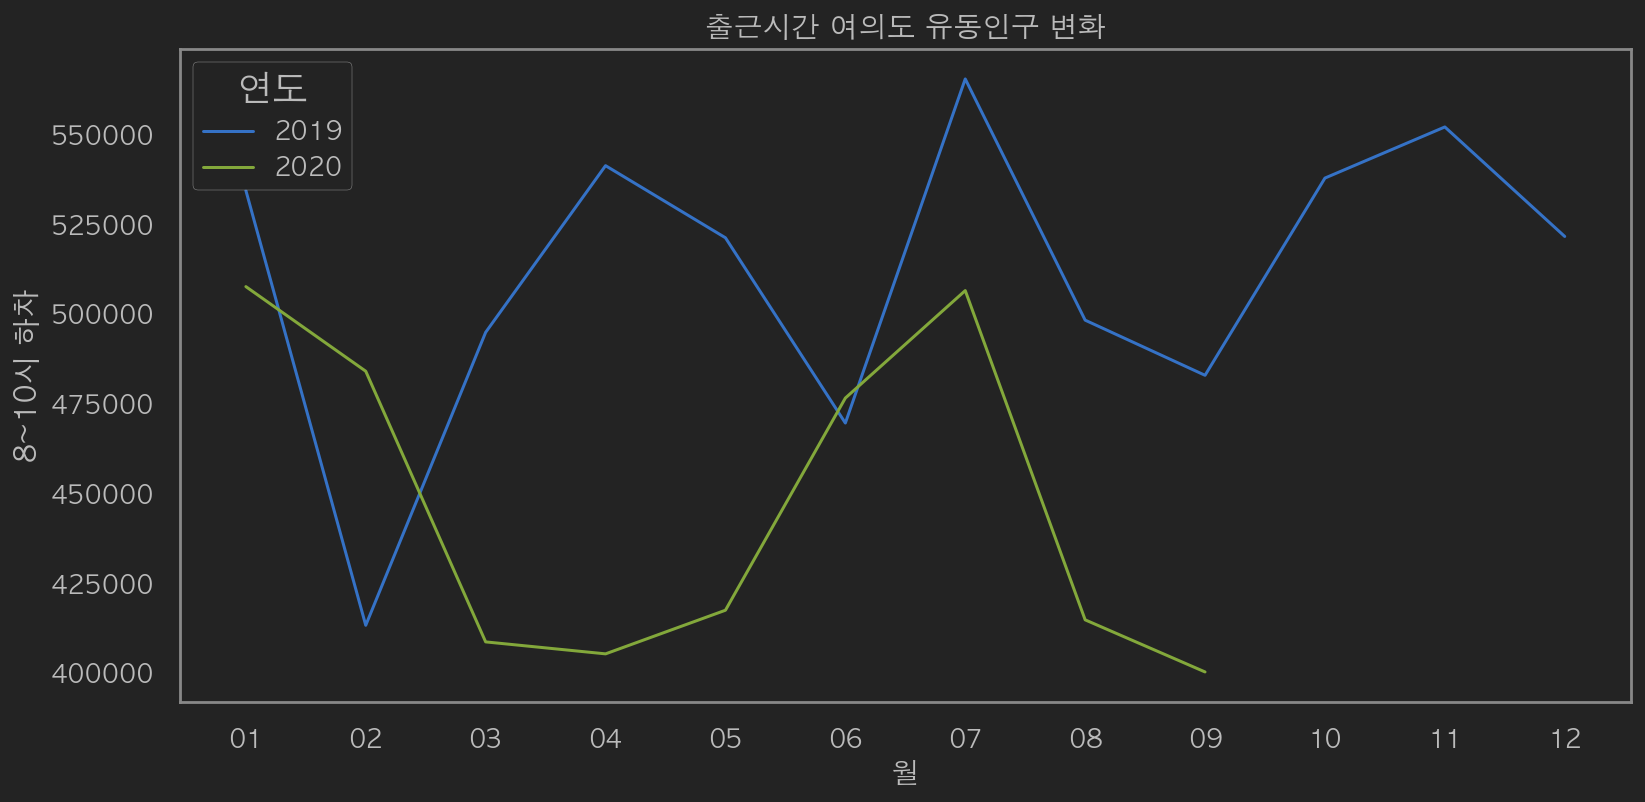

In [209]:
plt.figure(figsize=(13,6))
plt.title('출근시간 여의도 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '여의도'],x='월', y='8~10시 하차',hue='연도')

5) 잠실

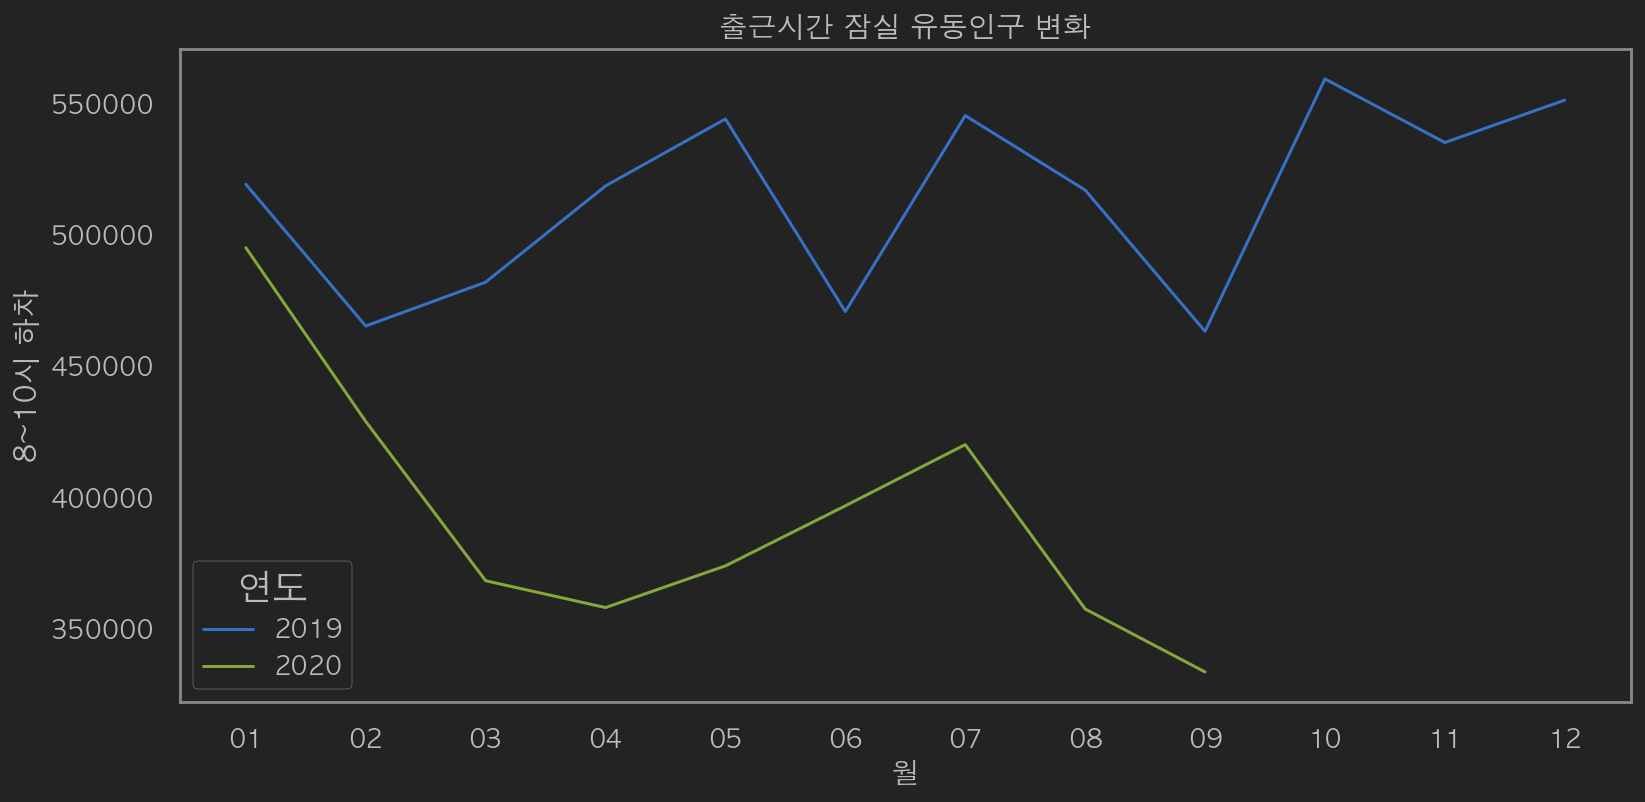

In [210]:
plt.figure(figsize=(13,6))
plt.title('출근시간 잠실 유동인구 변화')
g=sns.lineplot(data=df[df['역명'] == '잠실(송파구청)'],x='월', y='8~10시 하차',hue='연도')